## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Exploring data 

In [ ]:
data=pd.read_csv(r'D:\ESPRIT\4DS\Pi_Ds\FeaturesExtraction\Data\amine_final.csv')

In [ ]:
data.shape

(506637, 25)

In [ ]:
for col in data.columns:
    print(col)

Unnamed: 0
Unnamed: 0.1
0_Absolute energy
0_Area under the curve
0_Autocorrelation
0_Centroid
0_Entropy
0_HFD
0_Mean absolute diff
0_Mean diff
0_Median absolute diff
0_Median diff
0_Negative turning points
0_Neighbourhood peaks
0_PFD
0_Peak to peak distance
0_Positive turning points
0_SPECTRAL_ENTROPY
0_SVD_ENTROPY
0_Signal distance
0_Slope
0_Sum absolute diff
0_Total energy
0_Zero crossing rate
Tag


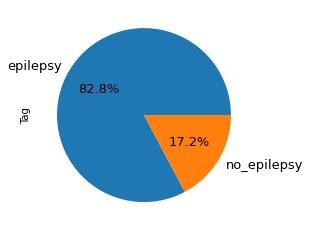

In [ ]:
data['Tag'].value_counts().plot.pie(autopct='%.1f%%',labels=['epilepsy','no_epilepsy'],fontsize=13)
plt.show()

In [ ]:
data.head()

,Unnamed: 0,Unnamed: 0.1,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Entropy,0_HFD,0_Mean absolute diff,0_Mean diff,...,0_Peak to peak distance,0_Positive turning points,0_SPECTRAL_ENTROPY,0_SVD_ENTROPY,0_Signal distance,0_Slope,0_Sum absolute diff,0_Total energy,0_Zero crossing rate,Tag
0,0,0.0,0.214933,0.137637,0.214933,19.908868,0.523785,0.870429,0.004001,-1.096583e-06,...,0.010965,2459.0,0.961588,2.264482,9999.135947,4.065461e-09,40.007864,0.005374,3017.0,epilepsy
1,1,1.0,0.212869,0.137648,0.212869,20.074096,0.534382,0.853697,0.004009,6.611124e-08,...,0.010965,2541.0,0.963424,2.264026,9999.134262,-1.992912e-08,40.087510,0.005322,2932.0,epilepsy
2,2,2.0,0.211065,0.132886,0.211065,20.056645,0.543723,0.883311,0.004287,2.047256e-07,...,0.010965,2660.0,0.965067,2.242634,9999.146500,1.953178e-10,42.861512,0.005277,3216.0,epilepsy
3,3,3.0,0.211173,0.130824,0.211173,19.975290,0.542275,0.902564,0.004399,2.028683e-07,...,0.010965,2654.0,0.954357,2.230903,9999.152398,1.853369e-08,43.985484,0.005280,3382.0,epilepsy
4,4,4.0,0.212760,0.132685,0.212760,19.875644,0.534411,0.898868,0.004306,1.090426e-06,...,0.010965,2574.0,0.952564,2.239864,9999.148932,2.636620e-08,43.058994,0.005320,3305.0,epilepsy


In [ ]:
data.dtypes

Unnamed: 0                     int64
Unnamed: 0.1                 float64
0_Absolute energy            float64
0_Area under the curve       float64
0_Autocorrelation            float64
0_Centroid                   float64
0_Entropy                    float64
0_HFD                        float64
0_Mean absolute diff         float64
0_Mean diff                  float64
0_Median absolute diff       float64
0_Median diff                float64
0_Negative turning points    float64
0_Neighbourhood peaks        float64
0_PFD                        float64
0_Peak to peak distance      float64
0_Positive turning points    float64
0_SPECTRAL_ENTROPY           float64
0_SVD_ENTROPY                float64
0_Signal distance            float64
0_Slope                      float64
0_Sum absolute diff          float64
0_Total energy               float64
0_Zero crossing rate         float64
Tag                           object
dtype: object

In [ ]:
data.nunique()

Unnamed: 0                   347106
Unnamed: 0.1                    519
0_Absolute energy            248792
0_Area under the curve       248958
0_Autocorrelation            248781
0_Centroid                   248911
0_Entropy                    248014
0_HFD                        251018
0_Mean absolute diff         231954
0_Mean diff                  125535
0_Median absolute diff         8073
0_Median diff                  2690
0_Negative turning points      2825
0_Neighbourhood peaks           635
0_PFD                          5393
0_Peak to peak distance       32629
0_Positive turning points      2826
0_SPECTRAL_ENTROPY           249264
0_SVD_ENTROPY                255125
0_Signal distance            155297
0_Slope                      248859
0_Sum absolute diff          232705
0_Total energy               248879
0_Zero crossing rate           4854
Tag                               2
dtype: int64

In [ ]:
ds=data[['0_Absolute energy','0_Area under the curve','0_Autocorrelation','0_Centroid','0_Entropy','0_HFD','0_Mean absolute diff','0_Mean diff','0_Median absolute diff','0_Median diff','0_Negative turning points','0_Neighbourhood peaks','0_PFD','0_Peak to peak distance','0_Positive turning points','0_SPECTRAL_ENTROPY','0_SVD_ENTROPY','0_Signal distance','0_Slope','0_Sum absolute diff','0_Total energy','0_Zero crossing rate','Tag']]

In [ ]:
ds

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Entropy,0_HFD,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,...,0_Peak to peak distance,0_Positive turning points,0_SPECTRAL_ENTROPY,0_SVD_ENTROPY,0_Signal distance,0_Slope,0_Sum absolute diff,0_Total energy,0_Zero crossing rate,Tag
0,0.214933,0.137637,0.214933,19.908868,0.523785,0.870429,0.004001,-1.096583e-06,0.003459,0.0,...,0.010965,2459.0,0.961588,2.264482,9999.135947,4.065461e-09,40.007864,5.373869e-03,3017.0,epilepsy
1,0.212869,0.137648,0.212869,20.074096,0.534382,0.853697,0.004009,6.611124e-08,0.003494,0.0,...,0.010965,2541.0,0.963424,2.264026,9999.134262,-1.992912e-08,40.087510,5.322257e-03,2932.0,epilepsy
2,0.211065,0.132886,0.211065,20.056645,0.543723,0.883311,0.004287,2.047256e-07,0.003820,0.0,...,0.010965,2660.0,0.965067,2.242634,9999.146500,1.953178e-10,42.861512,5.277164e-03,3216.0,epilepsy
3,0.211173,0.130824,0.211173,19.975290,0.542275,0.902564,0.004399,2.028683e-07,0.003970,0.0,...,0.010965,2654.0,0.954357,2.230903,9999.152398,1.853369e-08,43.985484,5.279860e-03,3382.0,epilepsy
4,0.212760,0.132685,0.212760,19.875644,0.534411,0.898868,0.004306,1.090426e-06,0.003867,0.0,...,0.010965,2574.0,0.952564,2.239864,9999.148932,2.636620e-08,43.058994,5.319537e-03,3305.0,epilepsy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506632,0.000003,0.000564,0.000003,20.354324,0.667670,0.220908,0.000002,-3.708254e-09,0.000002,0.0,...,0.000127,1640.0,0.695498,1.708365,9999.000000,-3.306952e-10,0.018259,8.325051e-08,447.0,no_epilepsy
506633,0.000003,0.000561,0.000003,19.680088,0.665403,0.256714,0.000002,3.998199e-09,0.000002,0.0,...,0.000120,1676.0,0.717898,1.748904,9999.000000,5.074985e-10,0.019666,7.843683e-08,429.0,no_epilepsy
506634,0.000003,0.000507,0.000003,18.696962,0.655014,0.221881,0.000002,-2.609512e-09,0.000002,0.0,...,0.000128,1622.0,0.725297,1.808618,9999.000000,3.268887e-10,0.019889,6.604886e-08,486.0,no_epilepsy
506635,0.000005,0.000654,0.000005,17.202044,0.680660,0.293953,0.000002,-7.630152e-11,0.000002,0.0,...,0.000174,1673.0,0.730297,1.704340,9999.000000,-3.416951e-10,0.021868,1.204570e-07,418.0,no_epilepsy


In [ ]:
for col in ds.columns:
    print(col)


0_Absolute energy
0_Area under the curve
0_Autocorrelation
0_Centroid
0_Entropy
0_HFD
0_Mean absolute diff
0_Mean diff
0_Median absolute diff
0_Median diff
0_Negative turning points
0_Neighbourhood peaks
0_PFD
0_Peak to peak distance
0_Positive turning points
0_SPECTRAL_ENTROPY
0_SVD_ENTROPY
0_Signal distance
0_Slope
0_Sum absolute diff
0_Total energy
0_Zero crossing rate
Tag


In [ ]:
ds.isnull().sum()

0_Absolute energy            0
0_Area under the curve       0
0_Autocorrelation            0
0_Centroid                   0
0_Entropy                    0
0_HFD                        0
0_Mean absolute diff         0
0_Mean diff                  0
0_Median absolute diff       0
0_Median diff                0
0_Negative turning points    0
0_Neighbourhood peaks        0
0_PFD                        0
0_Peak to peak distance      0
0_Positive turning points    0
0_SPECTRAL_ENTROPY           0
0_SVD_ENTROPY                0
0_Signal distance            0
0_Slope                      0
0_Sum absolute diff          0
0_Total energy               0
0_Zero crossing rate         0
Tag                          0
dtype: int64

### **KNN**

In [ ]:
X= ds.drop(['Tag'],axis=1)
y= ds['Tag']
clusters = RandomOverSampler(sampling_strategy='minority',random_state =1)
clusters.fit(X,y)
X_Sampled,Y_Sampled = clusters.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Sampled,Y_Sampled,test_size=0.2,random_state=1)
X_train.shape, X_test.shape,y_train ,y_test 

((671088, 22),
 (167772, 22),
 315662       epilepsy
 312003       epilepsy
 474181    no_epilepsy
 785435    no_epilepsy
 240682       epilepsy
              ...     
 491263    no_epilepsy
 791624    no_epilepsy
 470924    no_epilepsy
 491755    no_epilepsy
 128037       epilepsy
 Name: Tag, Length: 671088, dtype: object,
 804502    no_epilepsy
 793815    no_epilepsy
 64656        epilepsy
 761135    no_epilepsy
 158110       epilepsy
              ...     
 589603    no_epilepsy
 605440    no_epilepsy
 25094        epilepsy
 805108    no_epilepsy
 288694       epilepsy
 Name: Tag, Length: 167772, dtype: object)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#vérification_Centrage Réduction 
import numpy as np
#moyenne
print(np.mean(X_train,axis=0))
#écart-type
print(np.std(X_test,axis=0,ddof=0))

[ 9.99499831e-18  5.37442918e-17 -1.06726253e-17 -5.57348211e-17
 -2.75233031e-16 -7.18581086e-16 -2.37169451e-17 -3.28754976e-18
  2.71686077e-17 -2.98579399e-18 -1.77421808e-16  9.96958730e-17
 -1.28341708e-14  1.50136733e-17 -1.86770943e-16  3.02661043e-15
  4.45783277e-16 -2.69520744e-10 -9.52912974e-20 -1.15620108e-17
 -1.57760037e-17  1.09320294e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# leaf_size = list(range(1,25))  
# n_neighbors = list(range(1,20))
# p=[1,2] 
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# knn_2 = KNeighborsClassifier()
# clf = GridSearchCV(knn_2, hyperparameters, cv=5, n_jobs=-1)
# best_model = clf.fit(X_train, y_train)
# #Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(8,p=1,leaf_size=1 )
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.96


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[82788  1064]
 [ 3015 14461]]


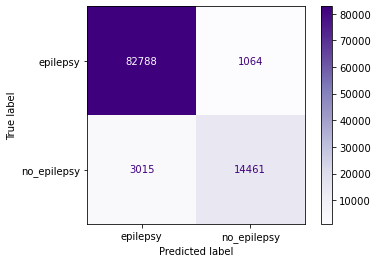

In [ ]:
# plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn_model, X_test, y_test, cmap="Purples")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

    epilepsy       0.96      0.99      0.98     83852
 no_epilepsy       0.93      0.83      0.88     17476

    accuracy                           0.96    101328
   macro avg       0.95      0.91      0.93    101328
weighted avg       0.96      0.96      0.96    101328

